## The homework of Python Essentials and Numpy ##

## Authors: Liling HUANG, Zhangjie LV, Shurui LIU, Yuhong ZHU, Kaisheng LIAN ##

## PART 1 Python Essentials ##

In [ ]:
import numpy as np

** Exercise 1 **

In [95]:
## Part 1 
x_val = [x for x in range(100)]      # Use list expression to generate a new list
y_val = [y for y in range(100,200)]
print (len(x_val) == len(y_val))         #compare the length of two lists
print (sum(x*y for x,y in zip(x_val,y_val))) #zip function returns [(x0,y0),(x1,y1),...,(x99,y99)]

## Part 2
x_values = range(100)
count_even = 0
for x in range(len(x_values)):
        if not x % 2 ==0 :
    	     count_even+=1
print("Number of even numbers :",count_even)

## Part 3
pairs = ((2, 5),(4, 2),(9, 8),(12, 10))
sum([x % 2 == 0 and y % 2 == 0 for x, y in pairs])

True
823350
Number of even numbers : 50


2

** Exercise 2 **

In [2]:
def p(x, coeff):
    return sum(a * x ** i for i, a in enumerate(coeff))
p(1,coeff=(1,2))

3

** Exercise 3 **

In [5]:
def f(string):
    count=0
    for letter in string:
        if letter==letter.upper() and letter.isalpha():  ## the isalpha is to recognize if the word is a letter.
            count+=1
    return count
# for example
f('We want to be excellent PHBSers.')

5

** Exercise 4 **

In [6]:
def f(seq_a,seq_b):
    same_element = True
    for i in seq_a:
        if i not in seq_b :
            same_element = False
    return same_element
## Now, we input 2 seqs and have a test.
print(f([1,2,3,4,5],[8,9,10,22]))
print(f([2,4],[1,2,4]))

False
True


** Exercise 5 **

In [7]:
def linapprox(f,a,b,n,x):
    len_q = b - a
    interpoint = n - 1
    delta_step = len_q / interpoint
    first_p = a
    
    while first_p <= x:
        first_p += delta_step
    
    u, v=[first_p - delta_step, first_p]
    return f(u) + (x - u) * (f(u) - f(v)) / (u - v)

def f(p):
    return p ** 2
## let do a test!!
linapprox(f, 8, 9, 7, 10)

100.0

** Exercise 6 **

1.Using enumerate to find out the indices of all the even integers in list l1=[1,3,5,2,1,6,8,0,3] 

In [22]:
l1=[1,3,5,2,1,6,8,0,3]
l2=[]
for index, item in enumerate(l1):
    if not item % 2 ==0 :
        l2.append(index)
l2

[0, 1, 2, 4, 8]

2.Using zip() function to perform the task above

In [27]:
l1=[1,3,5,2,1,6,8,0,3]
l2=[x for x in range(len(l1))]
l3= []
for x, y in zip(l1, l2):
    if not x % 2 == 0 :
        l3.append((x,y))
l3

[(1, 0), (3, 1), (5, 2), (1, 4), (3, 8)]

** Exercise 7 **

Get the location indices of the elements which are equal to 0, not equal to 0, larger than the mean, or smaller than the mean in  list l2=[1,3,5,2,7,10,0,2,3,0,1]

In [88]:
l2=[1,3,5,2,7,10,0,2,3,0,1]
meanvalue = sum(l2) / len(l2)
not_0 = []
is_0 = []
big_mean = []
small_mean = []
for index, item in enumerate(l2):
    if item == 0:
        is_0.append(index)
    else: 
        not_0.append(index)

for index, item in enumerate(l2):
    if item < meanvalue:
        small_mean.append(index)
    else: 
        big_mean.append(index)
     
print(is_0,not_0)
print(small_mean,big_mean)   


[6, 9] [0, 1, 2, 3, 4, 5, 7, 8, 10]
[0, 1, 3, 6, 7, 8, 9, 10] [2, 4, 5]


** Exercise 8 **

c1 and c2 are two booleans.
Use and, or, not to construct an exclusive or which is true when the true value of its components are different

In [111]:
## function
z=[]
def exclusive_or(c1,c2):
    for x,y in zip(c1,c2):
        z.append(False) if x&y==x and x&y==y else z.append(True)     
    return z
## a test
c1=[True,False,True]
c2=[False,False,True]
exclusive_or(c1,c2)

[True, False, False]

## PART 2 Numpy ##

** Exercise 1 **

In [61]:
import numpy as np
list_final=[]
def p(x, coeff):
    list_1 = np.zeros(len(coeff))
    list_1[:] = x
    list_1[0] = 1
    list_2 = np.cumprod(list_1)
    return np.dot(list_2, coeff)

p(2,coeff=[1,2])

5.0

** Exercise 2 **

In [94]:
## function
from random import uniform
def sample(q):
    a = 0.0
    U = uniform(0,1)
    q.sort()
    i = q.searchsorted(a)
    return i                    ## can only draw once

## a test
q0 = np.random.normal(0,1,size = 100)
q = np.array(q0)
q = q / sum(q0)
sample(q)

50

** Exercise 3 **

As following:

0.5


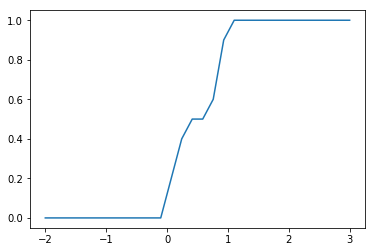

In [93]:
## function
import matplotlib.pyplot as plt

class ECDF:
    def __init__(self,observations):
        self.observations = observations
        
    def __call__(self,x):
        obs0 = np.array(self.observations)
        obs = len(obs0[obs0<=x])
        return obs/len(self.observations)
    
    def plot(self,a,b):
        z = np.linspace(a,b,30)
        cdf_list = []
        for i in range(len(z)):
            obs0 = np.array(self.observations)
            obs = len(obs0[obs0<=z[i]])
            cdf_list.append(obs/len(self.observations))
        plt.plot(z,cdf_list)
        return plt.show()

## a test
sample = [np.random.uniform(0,1) for i in range(10)]
F = ECDF(sample)
print(F(0.5))
F.plot(-2,3)

** Exercise 4 **

Using Array methods to calculate the variance of array (1,2,3,4,5) by definition, and compare your result with the function of variance.

In [85]:
## the result caculated by the definition ##
import numpy as np
s1 = np.linspace(1,5,5)
a = s1.mean()
s2 = s1 - a
s3 = s2 * s2
s4 = s3.sum() / len(s1)
print(s4)
## the result with the function of variance ##
print(np.var(s1))

2.0
2.0


** Exercise 5 **

In [ ]:
A = np.random.randn(4)
A.shape = (2,2)
B = np.random.randn(4)
B.shape = (2,2)
C = np.random.randn(4)
C.shape = (2,2)
#confirm rule 1 
print(((A@B)@C)-(A@(B@C)))
#confirm rule 2 
(A@B).T - B.T @ A.T

** Exercise 6 **

In [ ]:
a = np.random.uniform(0,1,(3,3))
a_indpt_copy = np.zeros_like(a)
np.copyto(a_indpt_copy , a)
a_dpt_copy = a

** Exercise 7 **

In [ ]:
import numpy as np
#generate the array
a=np.linspace(np.pi/100,np.pi,100)
#calculate
sin=np.sin(a ** 2)
cos=np.cos(a ** 2)
print('sin=\n',sin,'\ncos=\n',cos)

** Exercise 8 **

In [ ]:
#findings:ValueError: The truth value of an array with more than one element is ambiguous. 
#fix
import numpy as np
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
def f(x):
    return 1 if x % 5 == 0 else 0
f=np.vectorize(f)
f(A)